##### Tflite model convert
##### Hands-on-TinyML-main\ch04

Save model as tflite type

In [19]:
# 打开文件
class_names=[]
with open('output.txt', 'r') as file:
    # 逐行读取
    for line in file:
        # 去除行尾的换行符并处理数据
        data = line.strip()
        # 对数据进行分类处理
        # 例如，打印数据
        if data != "":
            class_names.append(data)
print(class_names)

['cats', 'dogs']


[[0.9990668]] 1 dogs


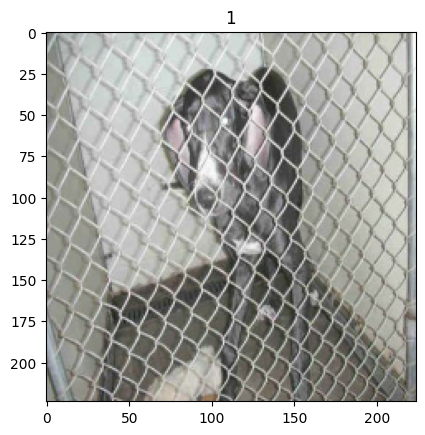

In [28]:
import PIL
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
Im = Image.open('sample5.png')


IMG_SHAPE=224
tflite_model_file = './model.tflite'          
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

Im_resized = Im.resize((IMG_SHAPE, IMG_SHAPE))
Im = np.asarray(Im_resized)

#Im = Im/255

input_data = np.array(Im, dtype=np.float32)

input_data = input_data.reshape(1, IMG_SHAPE, IMG_SHAPE, 3)

interpreter.set_tensor(input_index, input_data)
interpreter.invoke()
prediction = interpreter.get_tensor(output_index)
if prediction[0][0]<0.5 :
    predictionN =0
else:
    predictionN =1
#predictionN = np.argmax(prediction)


print(prediction, predictionN, class_names[predictionN])
plt.imshow(Im)
plt.title(predictionN)
#plt.axis('off')
plt.show()

In [22]:
#Use optimization

In [29]:
IMG_NAME='sample7.png'
tflite_model_file = 'tflite_models_qt/model.tflite'          
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

Im = Image.open(IMG_NAME)
Im_resized = Im.resize((IMG_SHAPE, IMG_SHAPE))
Im = np.asarray(Im_resized)

#Im = Im/255

input_data = np.array(Im, dtype=np.float32)

input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1], 3)

interpreter.set_tensor(input_index, input_data)
interpreter.invoke()
prediction = interpreter.get_tensor(output_index)
#prediction = np.argmax(prediction)
if prediction[0][0]<0.5 :
    predictionN =0
else:
    predictionN =1

print(prediction)

[[0.9951867]]


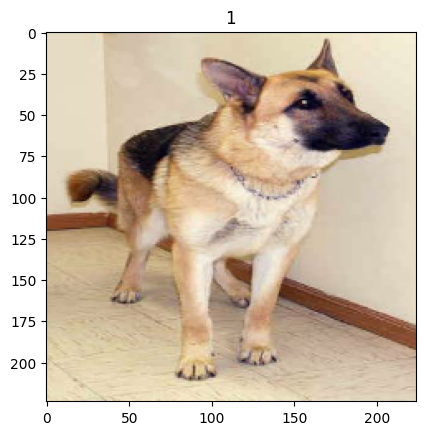

In [30]:
Im = Image.open(IMG_NAME)
plt.imshow(Im)


plt.title(predictionN)
#plt.axis('off')
plt.show()